In [2]:
!pip install langgraph langsmith

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.6/50.6 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 113.5/113.5 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.7/296.7 kB 19.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.0/78.0 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 407.7/407.7 kB 25.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.5/144.5 kB 11.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 4.5 MB/s eta 0:00:00


In [3]:
!pip install langchain langchain_groq langchain_community

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 20.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 30.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.5/106.5 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 3.7 MB/s eta 0:00:00


In [4]:
from google.colab import userdata
groq_api_key=userdata.get('groq_api_key')
langsmith=userdata.get('LANGSMITH_API_KEY')
print(groq_api_key)
print(langsmith)

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
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


In [5]:
import os
os.environ['LANGCHAIN_API_KEY']=langsmith
os.environ['LANGCHAIN_TRACING_V2']="true"
os.environ['LANGCHAIN_PROJECT']="CourseLanggraph"

In [6]:
from langchain_groq import ChatGroq

In [7]:
llm=ChatGroq(groq_api_key=groq_api_key, model_name="Gemma2-9b-It")
llm

ChatGroq(client=<groq.resources.chat.completions.Completions object at 0x7cbfa8e4a980>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x7cbfa8e496f0>, model_name='Gemma2-9b-It', model_kwargs={}, groq_api_key=SecretStr('**********'))

Start Building Chatbot Using Langgraph


In [8]:
from typing import Annotated
from typing_extensions import TypedDict
from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages

In [9]:
class State(TypedDict):
  # Messages have the type "list". The add_messages function
  # in the annotation defines how this state key should be updated
  # (in this case, it appends messages to the list, rather than overwriting them)
  messages:Annotated[list, add_messages]
graph_builder=StateGraph(State)

In [10]:
graph_builder

In [11]:
def chatbot(state:State):
  return {"messages":llm.invoke(state['messages'])}

In [12]:
graph_builder.add_node("chatbot", chatbot)

In [13]:
graph_builder

In [14]:
graph_builder.add_edge(START, "chatbot")
graph_builder.add_edge("chatbot", END)

In [15]:
graph=graph_builder.compile()

In [16]:
!pip install Ipython

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 24.1 MB/s eta 0:00:00


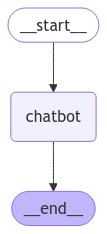

In [18]:
from IPython.display import Image, display
try:
  display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
  pass

In [ ]:
while True:
  user_input=input("User: ")
  if user_input.lower() in ["quit", "q"]:
    print("Good bye")
    break
  for event in graph.stream({'messages': ("user", user_input)}):
    print(event.values())
    for value in event.values():
      print(value['messages'])
      print("Assistant:", value['messages'].content)

User: hello
dict_values([{'messages': AIMessage(content='Hello! 👋  How can I help you today? 😊 \n\n', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 17, 'prompt_tokens': 10, 'total_tokens': 27, 'completion_time': 0.030909091, 'prompt_time': 3.6e-07, 'queue_time': 0.014144569000000001, 'total_time': 0.030909451}, 'model_name': 'Gemma2-9b-It', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'stop', 'logprobs': None}, id='run-84abefd4-0c93-4665-b672-cb184cb9f9dd-0', usage_metadata={'input_tokens': 10, 'output_tokens': 17, 'total_tokens': 27})}])
content='Hello! 👋  How can I help you today? 😊 \n\n' additional_kwargs={} response_metadata={'token_usage': {'completion_tokens': 17, 'prompt_tokens': 10, 'total_tokens': 27, 'completion_time': 0.030909091, 'prompt_time': 3.6e-07, 'queue_time': 0.014144569000000001, 'total_time': 0.030909451}, 'model_name': 'Gemma2-9b-It', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'stop', 'logprobs': None} id='r